In [1]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

# SVD: Singular Values Decomposition

In [3]:
df_tp=pd.read_csv('Algoritmos/XGBOOST/data/train_set_NOT_UNDER_num_cat_no_null.csv')
person=df_tp['person']
df_tp=df_tp.drop('person',1)
df_tp=df_tp.astype(np.float32)

In [4]:
df_tp.head()
df_tp['label']=df_tp['label'].apply(str)
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Columns: 2502 entries, Enero - cantidadEventos to label
dtypes: float32(2501), object(1)
memory usage: 185.4+ MB


In [5]:
df_tp.head()
df_tp['label']=df_tp['label'].apply(str)
df_tp['label']=df_tp['label'].str.replace('0.0','No_Convirtio')
df_tp['label']=df_tp['label'].str.replace('1.0','Convirtio')

df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Columns: 2502 entries, Enero - cantidadEventos to label
dtypes: float32(2501), object(1)
memory usage: 185.4+ MB


In [6]:
df_tp.head()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,No_Convirtio
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,No_Convirtio
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,No_Convirtio
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,No_Convirtio
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No_Convirtio


In [7]:
print(df_tp.shape)
print(type(df_tp))
df_tp.head()

(19414, 2502)
<class 'pandas.core.frame.DataFrame'>


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,No_Convirtio
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,No_Convirtio
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,No_Convirtio
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,No_Convirtio
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No_Convirtio


In [8]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Columns: 2502 entries, Enero - cantidadEventos to label
dtypes: float32(2501), object(1)
memory usage: 185.4+ MB


In [9]:
df_tp.describe()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,...,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,0.083445,0.013495,0.001185,0.000464,0.003966,0.023128,0.006542,0.012002,0.035953,0.041774,...,-0.163345,-0.165651,0.697557,0.002985,0.121746,0.938544,-0.461831,0.443969,0.429901,-0.499635
std,0.711080,0.169916,0.043643,0.027791,0.090979,0.415409,0.145343,0.238471,0.333659,0.462283,...,0.341547,0.343761,0.773923,0.053018,0.317126,0.245290,0.525005,0.491289,0.489495,0.502014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.857143,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.428571
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,24.000000,7.000000,3.000000,3.000000,4.000000,20.000000,7.000000,13.000000,14.000000,19.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000


In [10]:
df_tp['label'].value_counts()

No_Convirtio    18434
Convirtio         980
Name: label, dtype: int64

## Descomposicion SVD

In [11]:
from scipy.linalg import svd 
from scipy.sparse.linalg import svds
from scipy.sparse.linalg import eigs

In [12]:
## CENTRAMOS EL DF
centered = ((df_tp).iloc[:,:-1]) - df_tp.mean()

In [13]:
print(centered.shape)

(19414, 2501)


In [14]:
# CALCULAMOS SVD
u, s, vt = svd(centered)

In [15]:
print(u.shape)

(19414L, 19414L)


In [16]:
# VALORES SINGULARES
pd.DataFrame({'valores_singulares':s})

,valores_singulares
0,1589.393677
1,1185.980591
2,1003.732605
3,940.105225
4,757.133301
5,555.380798
6,475.276306
7,432.018951
8,429.326721
9,411.300140


In [20]:
print(s.shape)

(2501L,)


In [17]:
# verifiVEMOS vT
vt

array([[ 3.51434038e-03,  6.41867518e-04,  6.24656677e-05, ...,
         7.84491748e-03,  8.12606048e-03,  1.96288107e-03],
       [ 1.86329577e-02,  2.42161751e-03,  3.71396542e-04, ...,
        -2.03947187e-03, -1.91178557e-03,  4.24061436e-03],
       [ 3.23104952e-03,  3.52218747e-04,  1.02708116e-04, ...,
        -1.42694023e-02, -1.42069384e-02, -1.19928541e-02],
       ...,
       [ 0.00000000e+00,  3.67217581e-08, -4.11714041e-09, ...,
         4.69683437e-06, -1.70056592e-06, -1.29043838e-06],
       [ 0.00000000e+00, -1.78988557e-09, -6.05024475e-10, ...,
         1.12497219e-07, -4.07426342e-08, -3.10055839e-08],
       [ 0.00000000e+00, -3.59769911e-06,  1.04420933e-05, ...,
        -1.91134848e-02,  6.95671886e-03,  5.19950874e-03]], dtype=float32)

In [22]:
print(vt.shape)

(2501L, 2501L)


## DIMENSIONALIDAD DE LOS DATOS

Un plot de los valores singulares puede servirnos para tener una buena idea sobre la dimensionalidad intrinseca de nuestro datos. Esto lo podemos lograr buscando los "codos" en particular.

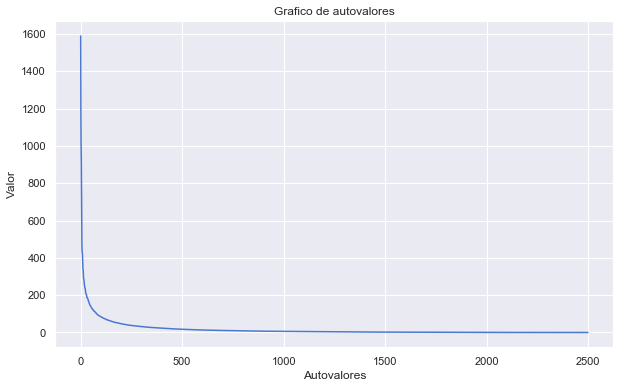

In [19]:
plt.title('Grafico de autovalores')
plt.xlabel('Autovalores')
plt.ylabel('Valor')
plt.plot(s)

### Podemos entonces llegar a la siguientes conclusiones

- La dimensionalidad intrinseca de nuestros datos teniendo un codo antes del 300 valor singular.
- Eliminando a partir de los autovalores 750 en adelante se pierde poco.

## Calculo de Energia de la Matriz

Esta es otra herramienta que podemos utilizar para entender o analizar la dimensionalidad de los datos.

In [22]:
singular_values = s
# el calculo total de la energia es igual a la suma 
# de los valores singulares al cuadrado
energy_total = sum(singular_values**2)
# de esta forma calculamos la cantidad de energia acumulada por
# cada valor singular
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[2.3526432e+01 1.3099305e+01 9.3827286e+00 ... 3.8428181e-14 3.8428181e-14
 6.3871375e-15]


In [23]:
energy_total

10737591.861829758

In [24]:
singular_values

array([1.5893937e+03, 1.1859806e+03, 1.0037326e+03, ..., 6.4235981e-05,
       6.4235981e-05, 2.6188256e-05], dtype=float32)

In [25]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 1589.3937 23.53%
Number of Singular Values 2: 1185.9806 36.63%
Number of Singular Values 3: 1003.7326 46.01%
Number of Singular Values 4: 940.1052 54.24%
Number of Singular Values 5: 757.1333 59.58%
Number of Singular Values 6: 555.3808 62.45%
Number of Singular Values 7: 475.2763 64.55%
Number of Singular Values 8: 432.01895 66.29%
Number of Singular Values 9: 429.32672 68.01%
Number of Singular Values 10: 411.30014 69.58%
Number of Singular Values 11: 374.2811 70.89%
Number of Singular Values 12: 340.08768 71.97%
Number of Singular Values 13: 334.2851 73.01%
Number of Singular Values 14: 323.48734 73.98%
Number of Singular Values 15: 288.79575 74.76%
Number of Singular Values 16: 286.93393 75.53%
Number of Singular Values 17: 282.90283 76.27%
Number of Singular Values 18: 269.74152 76.95%
Number of Singular Values 19: 259.4161 77.57%
Number of Singular Values 20: 249.3231 78.15%
Number of Singular Values 21: 241.60838 78.7%
Number of Singular Values 22: 2

Number of Singular Values 1279: 3.1580975 99.98%
Number of Singular Values 1280: 3.1541204 99.98%
Number of Singular Values 1281: 3.146105 99.98%
Number of Singular Values 1282: 3.132328 99.98%
Number of Singular Values 1283: 3.1288898 99.98%
Number of Singular Values 1284: 3.1254454 99.98%
Number of Singular Values 1285: 3.1189215 99.98%
Number of Singular Values 1286: 3.1046414 99.98%
Number of Singular Values 1287: 3.094016 99.98%
Number of Singular Values 1288: 3.0870202 99.98%
Number of Singular Values 1289: 3.083776 99.98%
Number of Singular Values 1290: 3.0767963 99.98%
Number of Singular Values 1291: 3.0663707 99.98%
Number of Singular Values 1292: 3.059918 99.98%
Number of Singular Values 1293: 3.0577278 99.98%
Number of Singular Values 1294: 3.047731 99.98%
Number of Singular Values 1295: 3.043997 99.98%
Number of Singular Values 1296: 3.0389822 99.98%
Number of Singular Values 1297: 3.0274658 99.98%
Number of Singular Values 1298: 3.018419 99.98%
Number of Singular Values 12

Number of Singular Values 2411: 6.423598e-05 100.0%
Number of Singular Values 2412: 6.423598e-05 100.0%
Number of Singular Values 2413: 6.423598e-05 100.0%
Number of Singular Values 2414: 6.423598e-05 100.0%
Number of Singular Values 2415: 6.423598e-05 100.0%
Number of Singular Values 2416: 6.423598e-05 100.0%
Number of Singular Values 2417: 6.423598e-05 100.0%
Number of Singular Values 2418: 6.423598e-05 100.0%
Number of Singular Values 2419: 6.423598e-05 100.0%
Number of Singular Values 2420: 6.423598e-05 100.0%
Number of Singular Values 2421: 6.423598e-05 100.0%
Number of Singular Values 2422: 6.423598e-05 100.0%
Number of Singular Values 2423: 6.423598e-05 100.0%
Number of Singular Values 2424: 6.423598e-05 100.0%
Number of Singular Values 2425: 6.423598e-05 100.0%
Number of Singular Values 2426: 6.423598e-05 100.0%
Number of Singular Values 2427: 6.423598e-05 100.0%
Number of Singular Values 2428: 6.423598e-05 100.0%
Number of Singular Values 2429: 6.423598e-05 100.0%
Number of Si

### Podemos entonces llegar a la siguientes conclusiones

- Utilizando los primeros 374 valores singulares vamos a estar reteniendo el 99% con muchas menos dimensiones.